Selected directory: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374
Initialized empty dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\1
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\1\Values.csv
Added column '1_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\10
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\10\Values.csv
Added column '10_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\11
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\11\Values.csv
Added column '11_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\2
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\2\Values.csv
Added column '2_Values' to dataframe.
Proces

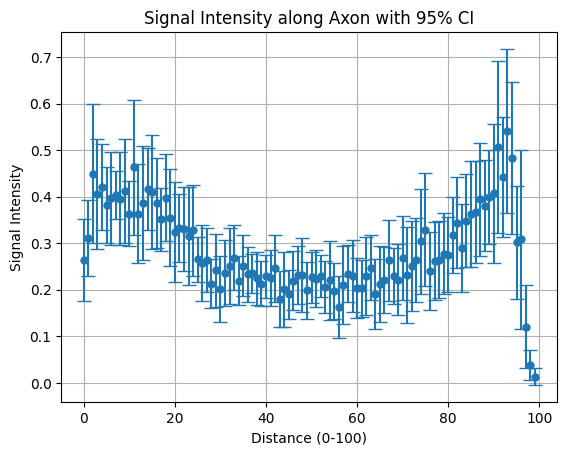

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog

# Select directory containing the folders
dirPath = filedialog.askdirectory(title='Select directory containing folders')
print(f"Selected directory: {dirPath}")

# Initialize an empty dataframe
df = pd.DataFrame()
print("Initialized empty dataframe.")

# Number of points after normalization
num_points = 100

# Loop through each folder in the directory
for foldername in os.listdir(dirPath):
    folderPath = os.path.join(dirPath, foldername)
    print(f"Processing folder: {folderPath}")
    
    # Loop through each CSV file in the folder
    for filename in os.listdir(folderPath):
        if filename.endswith('.csv'):
            filePath = os.path.join(folderPath, filename)
            print(f"Processing CSV file: {filePath}")
            
            # Import data from CSV file
            data = pd.read_csv(filePath)
            X1 = data.iloc[:, 0]
            Y1 = data.iloc[:, 1]
            
            # Normalize X-values
            Xnorm = (X1 - X1.min()) / (X1.max() - X1.min())
            
            # Normalize Y-values
            Ynorm = (Y1 - Y1.min()) / (Y1.max() - Y1.min())
            
            # Interpolate to ensure exactly num_points values
            Xnorm_interp = np.linspace(0, 1, num_points)
            Ynorm_interp = np.interp(Xnorm_interp, Xnorm, Ynorm)
            
            # Add normalized Y-values to the dataframe as a new column
            column_name = f"{foldername}_{os.path.splitext(filename)[0]}"
            df[column_name] = Ynorm_interp
            print(f"Added column '{column_name}' to dataframe.")

# Save the dataframe to an Excel file
excelFilePath = os.path.join(dirPath, 'normalized_data.xlsx')
df.to_excel(excelFilePath, index=False)
print(f"Dataframe saved to Excel file: {excelFilePath}")

# Compute mean and 95% CI
mean_intensity = df.mean(axis=1)  # Mean across different cells
std_intensity = df.std(axis=1)     # Standard deviation across different cells
n = df.shape[1]                    # Number of cells
ci = 1.96 * (std_intensity / np.sqrt(n))  # 95% CI

# Plot mean signal intensity with error bars
plt.errorbar(df.index, mean_intensity, yerr=ci, fmt='o', capsize=5, markersize=5)
plt.xlabel('Distance (0-100)')
plt.ylabel('Signal Intensity')
plt.title('Signal Intensity along Axon with 95% CI')
plt.grid(True)
plt.show()


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog

# Select directory containing the folders
dirPath = filedialog.askdirectory(title='Select directory containing folders')
print(f"Selected directory: {dirPath}")

# Initialize an empty dataframe
df = pd.DataFrame()
print("Initialized empty dataframe.")

# Number of points after normalization
num_points = 100

# Loop through each folder in the directory
for foldername in os.listdir(dirPath):
    folderPath = os.path.join(dirPath, foldername)
    print(f"Processing folder: {folderPath}")
    
    # Loop through each CSV file in the folder
    for filename in os.listdir(folderPath):
        if filename.endswith('.csv'):
            filePath = os.path.join(folderPath, filename)
            print(f"Processing CSV file: {filePath}")
            
            # Import data from CSV file
            data = pd.read_csv(filePath)
            X1 = data.iloc[:, 0]
            Y1 = data.iloc[:, 1]
            
            # Normalize X-values
            Xnorm = (X1 - X1.min()) / (X1.max() - X1.min())
            
            # Normalize Y-values
            Ynorm = (Y1 - Y1.min()) / (Y1.max() - Y1.min())
            
            # Interpolate to ensure exactly num_points values
            Xnorm_interp = np.linspace(0, 1, num_points)
            Ynorm_interp = np.interp(Xnorm_interp, Xnorm, Ynorm)
            
            # Add normalized Y-values to the dataframe as a new column
            column_name = f"{foldername}_{os.path.splitext(filename)[0]}"
            df[column_name] = Ynorm_interp
            print(f"Added column '{column_name}' to dataframe.")

# Save the dataframe to an Excel file in the same directory as the CSV files
outputDir = os.path.dirname(os.path.abspath(filePath))
excelFilePath = os.path.join(outputDir, 'normalized_data.xlsx')
df.to_excel(excelFilePath, index=False)
print(f"Dataframe saved to Excel file: {excelFilePath}")

# Compute mean and 95% CI
mean_intensity = df.mean(axis=1)  # Mean across different cells
std_intensity = df.std(axis=1)     # Standard deviation across different cells
n = df.shape[1]                    # Number of cells
ci = 1.96 * (std_intensity / np.sqrt(n))  # 95% CI

# Plot mean signal intensity with error bars and a connecting line
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.errorbar(df.index, mean_intensity, yerr=ci, fmt='o-', capsize=5, markersize=5)
plt.xlabel('Distance (0-100)', fontsize=14, fontweight='bold')
plt.ylabel('Signal Intensity', fontsize=14, fontweight='bold')
plt.title('Signal Intensity along Axon with 95% CI', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size
plt.grid(True)
plt.show()


Selected directory: 
Initialized empty dataframe.


FileNotFoundError: [WinError 3] The system cannot find the path specified: ''

Selected directory: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374
Initialized empty dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\1
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\1\Values.csv
Added column '1_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\10
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\10\Values.csv
Added column '10_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\11
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\11\Values.csv
Added column '11_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\2
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\2\Values.csv
Added column '2_Values' to dataframe.
Proces

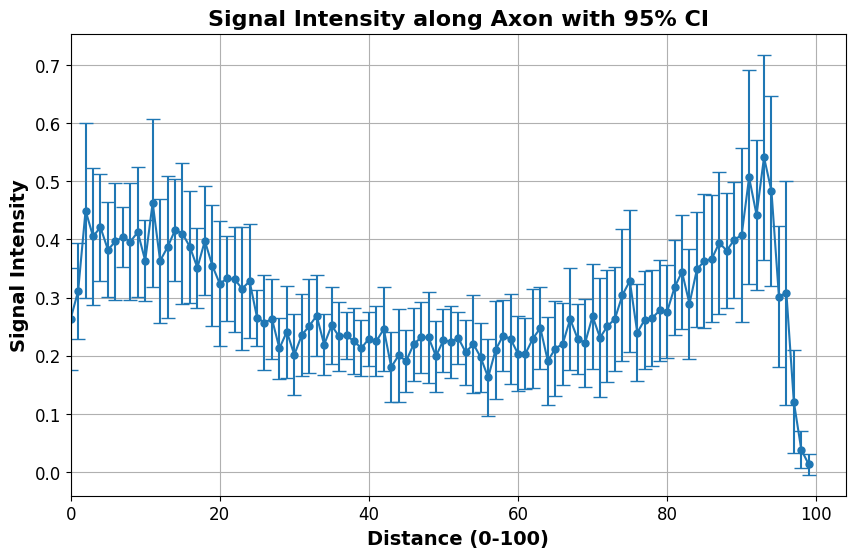

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog

# Select directory containing the folders
dirPath = filedialog.askdirectory(title='Select directory containing folders')
print(f"Selected directory: {dirPath}")

# Initialize an empty dataframe
df = pd.DataFrame()
print("Initialized empty dataframe.")

# Number of points after normalization
num_points = 100

# Loop through each folder in the directory
for foldername in os.listdir(dirPath):
    folderPath = os.path.join(dirPath, foldername)
    print(f"Processing folder: {folderPath}")
    
    # Loop through each CSV file in the folder
    for filename in os.listdir(folderPath):
        if filename.endswith('.csv'):
            filePath = os.path.join(folderPath, filename)
            print(f"Processing CSV file: {filePath}")
            
            # Import data from CSV file
            data = pd.read_csv(filePath)
            X1 = data.iloc[:, 0]
            Y1 = data.iloc[:, 1]
            
            # Normalize X-values
            Xnorm = (X1 - X1.min()) / (X1.max() - X1.min())
            
            # Normalize Y-values
            Ynorm = (Y1 - Y1.min()) / (Y1.max() - Y1.min())
            
            # Interpolate to ensure exactly num_points values
            Xnorm_interp = np.linspace(0, 1, num_points)
            Ynorm_interp = np.interp(Xnorm_interp, Xnorm, Ynorm)
            
            # Add normalized Y-values to the dataframe as a new column
            column_name = f"{foldername}_{os.path.splitext(filename)[0]}"
            df[column_name] = Ynorm_interp
            print(f"Added column '{column_name}' to dataframe.")

# Save the dataframe to an Excel file in the same directory as the CSV files
outputDir = os.path.dirname(os.path.abspath(filePath))
excelFilePath = os.path.join(outputDir, 'normalized_data.xlsx')
df.to_excel(excelFilePath, index=False)
print(f"Dataframe saved to Excel file: {excelFilePath}")

# Compute mean and 95% CI
mean_intensity = df.mean(axis=1)  # Mean across different cells
std_intensity = df.std(axis=1)     # Standard deviation across different cells
n = df.shape[1]                    # Number of cells
ci = 1.96 * (std_intensity / np.sqrt(n))  # 95% CI

# Plot mean signal intensity with error bars and a connecting line
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.errorbar(df.index, mean_intensity, yerr=ci, fmt='o-', capsize=5, markersize=5)
plt.xlabel('Distance (0-100)', fontsize=14, fontweight='bold')
plt.ylabel('Signal Intensity', fontsize=14, fontweight='bold')
plt.title('Signal Intensity along Axon with 95% CI', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size
plt.grid(True)
plt.xlim(0)
plt.show()


Selected directory: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374
Initialized empty dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\1
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\1\Values.csv
Added column '1_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\10
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\10\Values.csv
Added column '10_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\11
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\11\Values.csv
Added column '11_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\2
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\2\Values.csv
Added column '2_Values' to dataframe.
Proces

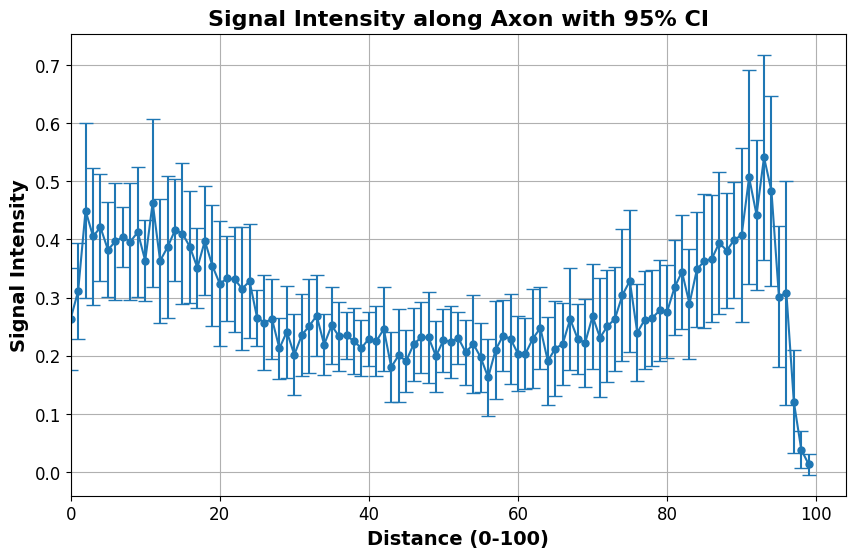

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog

# Select directory containing the folders
dirPath = filedialog.askdirectory(title='Select directory containing folders')
print(f"Selected directory: {dirPath}")

# Initialize an empty dataframe
df = pd.DataFrame()
print("Initialized empty dataframe.")

# Number of points after normalization
num_points = 100

# Loop through each folder in the directory
for foldername in os.listdir(dirPath):
    folderPath = os.path.join(dirPath, foldername)
    print(f"Processing folder: {folderPath}")
    
    # Loop through each CSV file in the folder
    for filename in os.listdir(folderPath):
        if filename.endswith('.csv'):
            filePath = os.path.join(folderPath, filename)
            print(f"Processing CSV file: {filePath}")
            
            # Import data from CSV file
            data = pd.read_csv(filePath)
            X1 = data.iloc[:, 0]
            Y1 = data.iloc[:, 1]
            
            # Normalize X-values
            Xnorm = (X1 - X1.min()) / (X1.max() - X1.min())
            
            # Normalize Y-values
            Ynorm = (Y1 - Y1.min()) / (Y1.max() - Y1.min())
            
            # Interpolate to ensure exactly num_points values
            Xnorm_interp = np.linspace(0, 1, num_points)
            Ynorm_interp = np.interp(Xnorm_interp, Xnorm, Ynorm)
            
            # Add normalized Y-values to the dataframe as a new column
            column_name = f"{foldername}_{os.path.splitext(filename)[0]}"
            df[column_name] = Ynorm_interp
            print(f"Added column '{column_name}' to dataframe.")

# Save the dataframe to an Excel file in the selected directory
excelFilePath = os.path.join(dirPath, 'normalized_data.xlsx')
df.to_excel(excelFilePath, index=False)
print(f"Dataframe saved to Excel file: {excelFilePath}")

# Compute mean and 95% CI
mean_intensity = df.mean(axis=1)  # Mean across different cells
std_intensity = df.std(axis=1)     # Standard deviation across different cells
n = df.shape[1]                    # Number of cells
ci = 1.96 * (std_intensity / np.sqrt(n))  # 95% CI

# Plot mean signal intensity with error bars and a connecting line
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.errorbar(df.index, mean_intensity, yerr=ci, fmt='o-', capsize=5, markersize=5)
plt.xlabel('Distance (0-100)', fontsize=14, fontweight='bold')
plt.ylabel('Signal Intensity', fontsize=14, fontweight='bold')
plt.title('Signal Intensity along Axon with 95% CI', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size
plt.grid(True)
plt.xlim(0)  # Set x-axis to start at 0
plt.show()


Selected directory: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374
Initialized empty dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\1
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\1\Values.csv
Added column '1_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\10
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\10\Values.csv
Added column '10_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\11
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\11\Values.csv
Added column '11_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\2
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal/e374\2\Values.csv
Added column '2_Values' to dataframe.
Proces

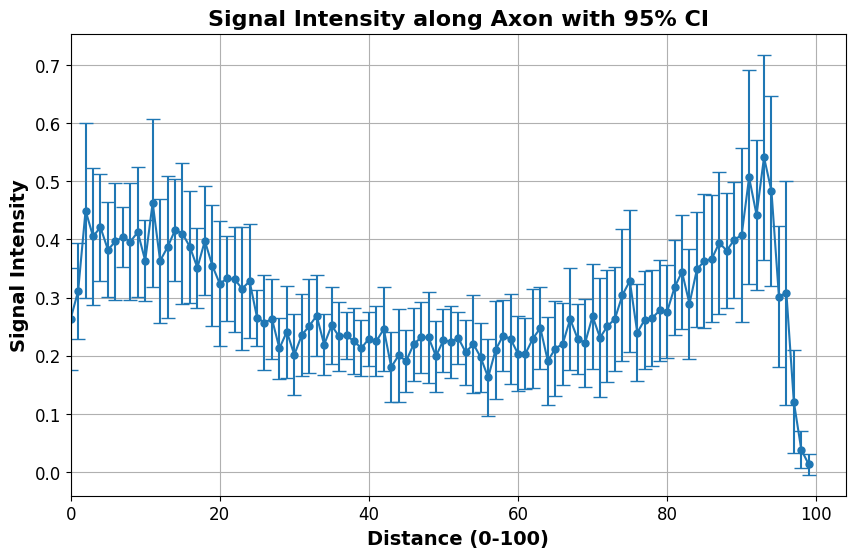

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog

# Select directory containing the folders
dirPath = filedialog.askdirectory(title='Select directory containing folders')
print(f"Selected directory: {dirPath}")

# Initialize an empty dataframe
df = pd.DataFrame()
print("Initialized empty dataframe.")

# Number of points after normalization
num_points = 100

# Loop through each folder in the directory
for foldername in os.listdir(dirPath):
    folderPath = os.path.join(dirPath, foldername)
    print(f"Processing folder: {folderPath}")
    
    # Loop through each CSV file in the folder
    for filename in os.listdir(folderPath):
        if filename.endswith('.csv'):
            filePath = os.path.join(folderPath, filename)
            print(f"Processing CSV file: {filePath}")
            
            # Import data from CSV file
            data = pd.read_csv(filePath)
            X1 = data.iloc[:, 0]
            Y1 = data.iloc[:, 1]
            
            # Normalize X-values
            Xnorm = (X1 - X1.min()) / (X1.max() - X1.min())
            
            # Normalize Y-values
            Ynorm = (Y1 - Y1.min()) / (Y1.max() - Y1.min())
            
            # Interpolate to ensure exactly num_points values
            Xnorm_interp = np.linspace(0, 1, num_points)
            Ynorm_interp = np.interp(Xnorm_interp, Xnorm, Ynorm)
            
            # Add normalized Y-values to the dataframe as a new column
            column_name = f"{foldername}_{os.path.splitext(filename)[0]}"
            df[column_name] = Ynorm_interp
            print(f"Added column '{column_name}' to dataframe.")

# Save the dataframe to an Excel file in the selected directory
excelFilePath = os.path.join(dirPath, 'normalized_data.xlsx')
df.to_excel(excelFilePath, index=False)
print(f"Dataframe saved to Excel file: {excelFilePath}")

# Compute mean and 95% CI
mean_intensity = df.mean(axis=1)  # Mean across different cells
std_intensity = df.std(axis=1)     # Standard deviation across different cells
n = df.shape[1]                    # Number of cells
ci = 1.96 * (std_intensity / np.sqrt(n))  # 95% CI

# Plot mean signal intensity with error bars and a connecting line
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.errorbar(df.index, mean_intensity, yerr=ci, fmt='o-', capsize=5, markersize=5)
plt.xlabel('Distance (0-100)', fontsize=14, fontweight='bold')
plt.ylabel('Signal Intensity', fontsize=14, fontweight='bold')
plt.title('Signal Intensity along Axon with 95% CI', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size
plt.grid(True)
plt.xlim(0)  # Set x-axis to start at 0

# Save the plot as a vector image file (EPS) in the same directory as the Excel file
plotFilePath = os.path.join(dirPath, 'signal_intensity_plot.eps')
plt.savefig(plotFilePath, format='eps')
print(f"Plot saved as vector image file (EPS): {plotFilePath}")


plt.show()


Selected directory: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal
Condition folders found: ['e374', 'wt']
Processing condition folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374
Dataframe saved to Excel file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\normalized_data.xlsx
Processing condition folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt
Dataframe saved to Excel file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\normalized_data.xlsx


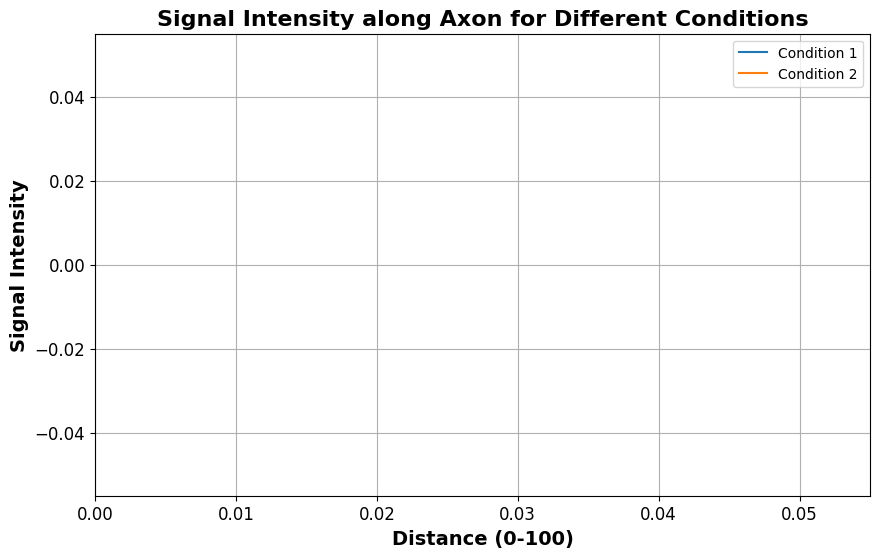

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog

# Select directory containing the condition folders
dirPath = filedialog.askdirectory(title='Select directory containing condition folders')
print(f"Selected directory: {dirPath}")

# Get a list of only directories (folders) within the selected directory
condition_folders = [folder for folder in os.listdir(dirPath) if os.path.isdir(os.path.join(dirPath, folder))]
print(f"Condition folders found: {condition_folders}")

# Initialize an empty list to store dataframes for each condition
condition_dfs = []

# Number of points after normalization
num_points = 100

# Loop through each condition folder in the directory
for i, condition_folder in enumerate(condition_folders):
    conditionFolderPath = os.path.join(dirPath, condition_folder)
    print(f"Processing condition folder: {conditionFolderPath}")
    
    # Initialize an empty dataframe for each condition
    df = pd.DataFrame()
    
    # Loop through each CSV file in the condition folder
    for filename in os.listdir(conditionFolderPath):
        if filename.endswith('.csv'):
            filePath = os.path.join(conditionFolderPath, filename)
            print(f"Processing CSV file: {filePath}")
            
            # Import data from CSV file
            data = pd.read_csv(filePath)
            X1 = data.iloc[:, 0]
            Y1 = data.iloc[:, 1]
            
            # Normalize X-values
            Xnorm = (X1 - X1.min()) / (X1.max() - X1.min())
            
            # Normalize Y-values
            Ynorm = (Y1 - Y1.min()) / (Y1.max() - Y1.min())

            print("Normalized X values:")
            print(Xnorm)
            print("Normalized Y values:")
            print(Ynorm)

            # Interpolate to ensure exactly num_points values
            Xnorm_interp = np.linspace(0, 1, num_points)
            Ynorm_interp = np.interp(Xnorm_interp, Xnorm, Ynorm)

            print("Interpolated X values:")
            print(Xnorm_interp)
            print("Interpolated Y values:")
            print(Ynorm_interp)
            
            # Add normalized Y-values to the dataframe as a new column
            column_name = f"{condition_folder}_{os.path.splitext(filename)[0]}"
            df[column_name] = Ynorm_interp
            print(f"Added column '{column_name}' to dataframe for {condition_folder} condition.")

    # Append the dataframe for the current condition to the list
    condition_dfs.append(df)

    # Save the dataframe to an Excel file in the condition folder
    excelFilePath = os.path.join(conditionFolderPath, 'normalized_data.xlsx')
    df.to_excel(excelFilePath, index=False)
    print(f"Dataframe saved to Excel file: {excelFilePath}")

# Plot signal intensity for each condition
plt.figure(figsize=(10, 6))  # Adjust figure size
for i, df in enumerate(condition_dfs):
    mean_intensity = df.mean(axis=1)
    plt.plot(df.index, mean_intensity, label=f'Condition {i+1}')

plt.xlabel('Distance (0-100)', fontsize=14, fontweight='bold')
plt.ylabel('Signal Intensity', fontsize=14, fontweight='bold')
plt.title('Signal Intensity along Axon for Different Conditions', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size
plt.legend()
plt.grid(True)
plt.xlim(0)  # Set x-axis to start at 0

# Show the plot
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog

# Select directory containing the folders
dirPath = filedialog.askdirectory(title='Select directory containing folders')
print(f"Selected directory: {dirPath}")


# Number of points after normalization
num_points = 100

# Loop through each condition folder in the directory
for i, condition_folder in enumerate(condition_folders):
    conditionFolderPath = os.path.join(dirPath, condition_folder)
    print(f"Processing condition folder: {conditionFolderPath}")

    # Initialize an empty dataframe
    df(1+i) = pd.DataFrame()
    print("Initialized empty dataframe.")

    # Loop through each folder in the directory
    for foldername in os.listdir(dirPath):
        folderPath = os.path.join(dirPath, foldername)
        print(f"Processing folder: {folderPath}")
        
        # Loop through each CSV file in the folder
        for filename in os.listdir(folderPath):
            if filename.endswith('.csv'):
                filePath = os.path.join(folderPath, filename)
                print(f"Processing CSV file: {filePath}")
                
                # Import data from CSV file
                data = pd.read_csv(filePath)
                X1 = data.iloc[:, 0]
                Y1 = data.iloc[:, 1]
                
                # Normalize X-values
                Xnorm = (X1 - X1.min()) / (X1.max() - X1.min())
                
                # Normalize Y-values
                Ynorm = (Y1 - Y1.min()) / (Y1.max() - Y1.min())
                
                # Interpolate to ensure exactly num_points values
                Xnorm_interp = np.linspace(0, 1, num_points)
                Ynorm_interp = np.interp(Xnorm_interp, Xnorm, Ynorm)
                
                # Add normalized Y-values to the dataframe as a new column
                column_name = f"{foldername}_{os.path.splitext(filename)[0]}"
                df(1+i)[column_name] = Ynorm_interp
                print(f"Added column '{column_name}' to dataframe.")

    # Save the dataframe to an Excel file in the selected directory
    excelFilePath = os.path.join(dirPath, 'normalized_data.xlsx')
    df(1+i).to_excel(excelFilePath, index=False)
    print(f"Dataframe saved to Excel file: {excelFilePath}")

    # Compute mean and 95% CI
    mean_intensity = df(1+i).mean(axis=1)  # Mean across different cells
    std_intensity = df(1+i).std(axis=1)     # Standard deviation across different cells
    n = df.shape[1]                    # Number of cells
    ci = 1.96 * (std_intensity / np.sqrt(n))  # 95% CI

    # Plot mean signal intensity with error bars and a connecting line
    plt.figure(figsize=(10, 6))  # Adjust figure size
    plt.errorbar(df(1+i).index, mean_intensity, yerr=ci, fmt='o-', capsize=5, markersize=5)
    plt.xlabel('Distance (0-100)', fontsize=14, fontweight='bold')
    plt.ylabel('Signal Intensity', fontsize=14, fontweight='bold')
    plt.title('Signal Intensity along Axon with 95% CI', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)  # Increase x-axis tick font size
    plt.yticks(fontsize=12)  # Increase y-axis tick font size
    plt.grid(True)
    plt.xlim(0)  # Set x-axis to start at 0

    # Save the plot as a vector image file (EPS) in the same directory as the Excel file
    plotFilePath = os.path.join(dirPath, 'signal_intensity_plot.eps')
    plt.savefig(plotFilePath, format='eps')
    print(f"Plot saved as vector image file (EPS): {plotFilePath}")


    plt.show()

    


Selected directory: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal
Processing condition folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374
Initialized empty dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\1
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\1\Values.csv
Added column '1_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\10
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\10\Values.csv
Added column '10_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\11
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\11\Values.csv
Added column '11_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\2
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 

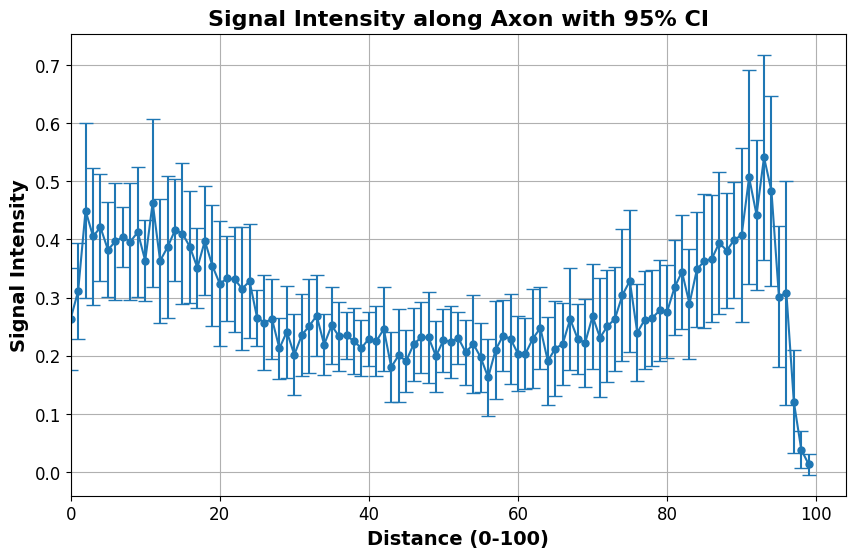

Processing condition folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt
Initialized empty dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\1
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\1\Values.csv
Added column '1_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\10
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\10\Values.csv
Added column '10_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\2
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\2\Values.csv
Added column '2_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\3
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\3\Values.csv
Added column '3_Values' to dataframe.
Processing folder:

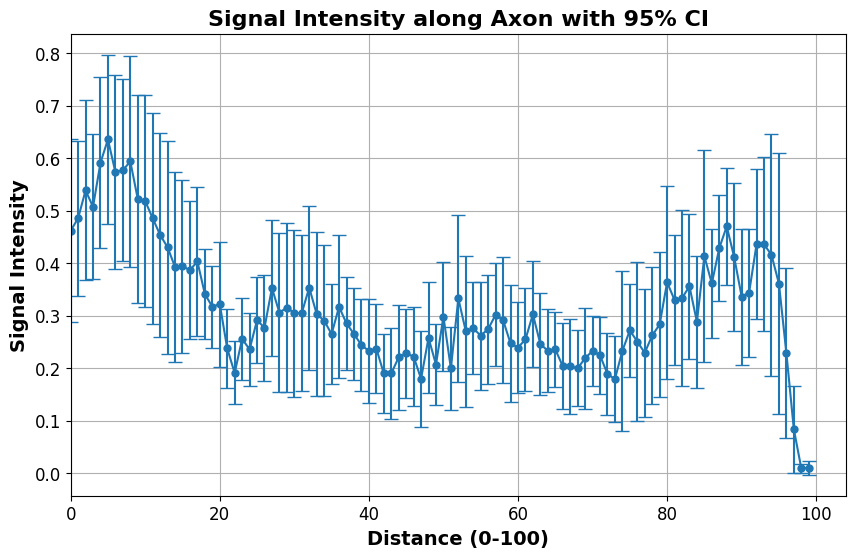

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog

# Select directory containing the folders
dirPath = filedialog.askdirectory(title='Select directory containing folders')
print(f"Selected directory: {dirPath}")

# Get a list of directories (folders) in the selected directory
condition_folders = [folder for folder in os.listdir(dirPath) if os.path.isdir(os.path.join(dirPath, folder))]

# Number of points after normalization
num_points = 100

# Initialize an empty dictionary to store DataFrames for each condition folder
dfs = {}

# Loop through each condition folder in the directory
for i, condition_folder in enumerate(condition_folders):
    conditionFolderPath = os.path.join(dirPath, condition_folder)
    print(f"Processing condition folder: {conditionFolderPath}")

    # Initialize an empty dataframe for the current condition folder
    df = pd.DataFrame()
    print("Initialized empty dataframe.")

    # Loop through each folder in the condition folder
    for foldername in os.listdir(conditionFolderPath):
        folderPath = os.path.join(conditionFolderPath, foldername)
        print(f"Processing folder: {folderPath}")
        
        # Loop through each CSV file in the folder
        for filename in os.listdir(folderPath):
            if filename.endswith('.csv'):
                filePath = os.path.join(folderPath, filename)
                print(f"Processing CSV file: {filePath}")
                
                # Import data from CSV file
                data = pd.read_csv(filePath)
                X1 = data.iloc[:, 0]
                Y1 = data.iloc[:, 1]
                
                # Normalize X-values
                Xnorm = (X1 - X1.min()) / (X1.max() - X1.min())
                
                # Normalize Y-values
                Ynorm = (Y1 - Y1.min()) / (Y1.max() - Y1.min())
                
                # Interpolate to ensure exactly num_points values
                Xnorm_interp = np.linspace(0, 1, num_points)
                Ynorm_interp = np.interp(Xnorm_interp, Xnorm, Ynorm)
                
                # Add normalized Y-values to the dataframe as a new column
                column_name = f"{foldername}_{os.path.splitext(filename)[0]}"
                df[column_name] = Ynorm_interp
                print(f"Added column '{column_name}' to dataframe.")

    # Save the dataframe to the dictionary with the condition folder name as key
    dfs[condition_folder] = df

    # Save the dataframe to an Excel file in the selected directory
    excelFilePath = os.path.join(dirPath, f'normalized_data_condition_{i}.xlsx')
    df.to_excel(excelFilePath, index=False)
    print(f"Dataframe saved to Excel file: {excelFilePath}")

    # Compute mean and 95% CI
    mean_intensity = df.mean(axis=1)  # Mean across different cells
    std_intensity = df.std(axis=1)     # Standard deviation across different cells
    n = df.shape[1]                    # Number of cells
    ci = 1.96 * (std_intensity / np.sqrt(n))  # 95% CI

    # Plot mean signal intensity with error bars and a connecting line
    plt.figure(figsize=(10, 6))  # Adjust figure size
    plt.errorbar(df.index, mean_intensity, yerr=ci, fmt='o-', capsize=5, markersize=5)
    plt.xlabel('Distance (0-100)', fontsize=14, fontweight='bold')
    plt.ylabel('Signal Intensity', fontsize=14, fontweight='bold')
    plt.title('Signal Intensity along Axon with 95% CI', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)  # Increase x-axis tick font size
    plt.yticks(fontsize=12)  # Increase y-axis tick font size
    plt.grid(True)
    plt.xlim(0)  # Set x-axis to start at 0

    # Save the plot as a vector image file (EPS) in the same directory as the Excel file
    plotFilePath = os.path.join(dirPath, f'signal_intensity_plot_condition_{i}.eps')
    plt.savefig(plotFilePath, format='eps')
    print(f"Plot saved as vector image file (EPS): {plotFilePath}")

    plt.show()


Selected directory: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal
Processing condition folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374
Initialized empty dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\1
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\1\Values.csv
Added column '1_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\10
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\10\Values.csv
Added column '10_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\11
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\11\Values.csv
Added column '11_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\2
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 

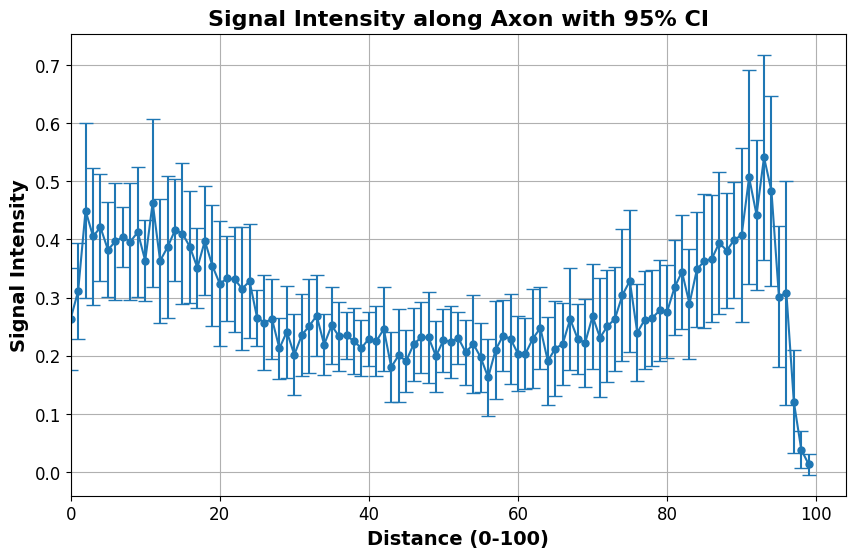

Processing condition folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt
Initialized empty dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\1
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\1\Values.csv
Added column '1_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\10
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\10\Values.csv
Added column '10_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\2
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\2\Values.csv
Added column '2_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\3
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\3\Values.csv
Added column '3_Values' to dataframe.
Processing folder:

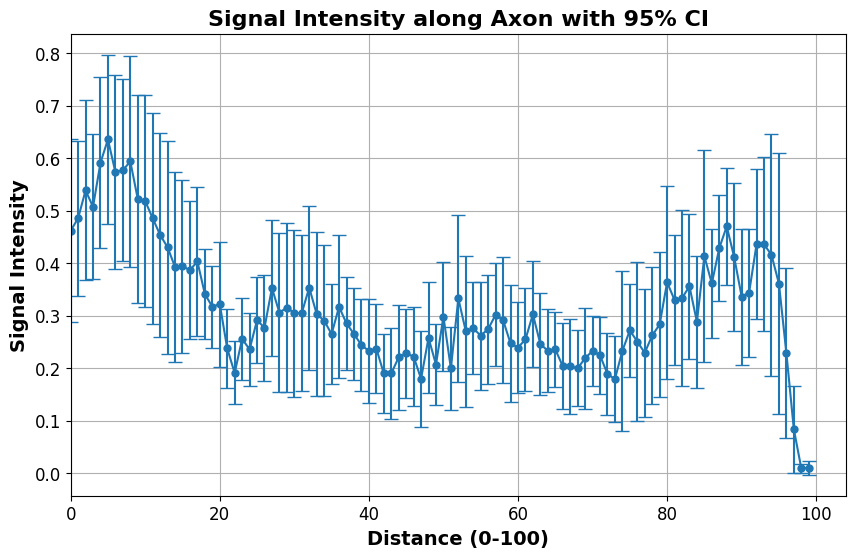

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog

# Select directory containing the folders
dirPath = filedialog.askdirectory(title='Select directory containing folders')
print(f"Selected directory: {dirPath}")

# Get a list of directories (folders) in the selected directory
condition_folders = [folder for folder in os.listdir(dirPath) if os.path.isdir(os.path.join(dirPath, folder))]

# Number of points after normalization
num_points = 100

# Loop through each condition folder in the directory
for i, condition_folder in enumerate(condition_folders):
    conditionFolderPath = os.path.join(dirPath, condition_folder)
    print(f"Processing condition folder: {conditionFolderPath}")

    # Initialize an empty dataframe for the current condition folder
    df = pd.DataFrame()
    print("Initialized empty dataframe.")

    # Loop through each folder in the condition folder
    for foldername in os.listdir(conditionFolderPath):
        folderPath = os.path.join(conditionFolderPath, foldername)
        print(f"Processing folder: {folderPath}")
        
        # Loop through each CSV file in the folder
        for filename in os.listdir(folderPath):
            if filename.endswith('.csv'):
                filePath = os.path.join(folderPath, filename)
                print(f"Processing CSV file: {filePath}")
                
                # Import data from CSV file
                data = pd.read_csv(filePath)
                X1 = data.iloc[:, 0]
                Y1 = data.iloc[:, 1]
                
                # Normalize X-values
                Xnorm = (X1 - X1.min()) / (X1.max() - X1.min())
                
                # Normalize Y-values
                Ynorm = (Y1 - Y1.min()) / (Y1.max() - Y1.min())
                
                # Interpolate to ensure exactly num_points values
                Xnorm_interp = np.linspace(0, 1, num_points)
                Ynorm_interp = np.interp(Xnorm_interp, Xnorm, Ynorm)
                
                # Add normalized Y-values to the dataframe as a new column
                column_name = f"{foldername}_{os.path.splitext(filename)[0]}"
                df[column_name] = Ynorm_interp
                print(f"Added column '{column_name}' to dataframe.")

    # Save the dataframe to an Excel file in the condition folder
    excelFilePath = os.path.join(conditionFolderPath, f'normalized_data_condition_{i}.xlsx')
    df.to_excel(excelFilePath, index=False)
    print(f"Dataframe saved to Excel file: {excelFilePath}")

    # Compute mean and 95% CI
    mean_intensity = df.mean(axis=1)  # Mean across different cells
    std_intensity = df.std(axis=1)     # Standard deviation across different cells
    n = df.shape[1]                    # Number of cells
    ci = 1.96 * (std_intensity / np.sqrt(n))  # 95% CI

    # Plot mean signal intensity with error bars and a connecting line
    plt.figure(figsize=(10, 6))  # Adjust figure size
    plt.errorbar(df.index, mean_intensity, yerr=ci, fmt='o-', capsize=5, markersize=5)
    plt.xlabel('Distance (0-100)', fontsize=14, fontweight='bold')
    plt.ylabel('Signal Intensity', fontsize=14, fontweight='bold')
    plt.title('Signal Intensity along Axon with 95% CI', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)  # Increase x-axis tick font size
    plt.yticks(fontsize=12)  # Increase y-axis tick font size
    plt.grid(True)
    plt.xlim(0)  # Set x-axis to start at 0

    # Save the plot as a vector image file (EPS) in the same directory as the Excel file
    plotFilePath = os.path.join(conditionFolderPath, f'signal_intensity_plot_condition_{i}.eps')
    plt.savefig(plotFilePath, format='eps')
    print(f"Plot saved as vector image file (EPS): {plotFilePath}")

    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Selected directory: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal
Processing condition folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374
Initialized empty dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\1
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\1\Values.csv
Added column '1_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\10
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\10\Values.csv
Added column '10_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\11
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\11\Values.csv
Added column '11_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\e374\2
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 

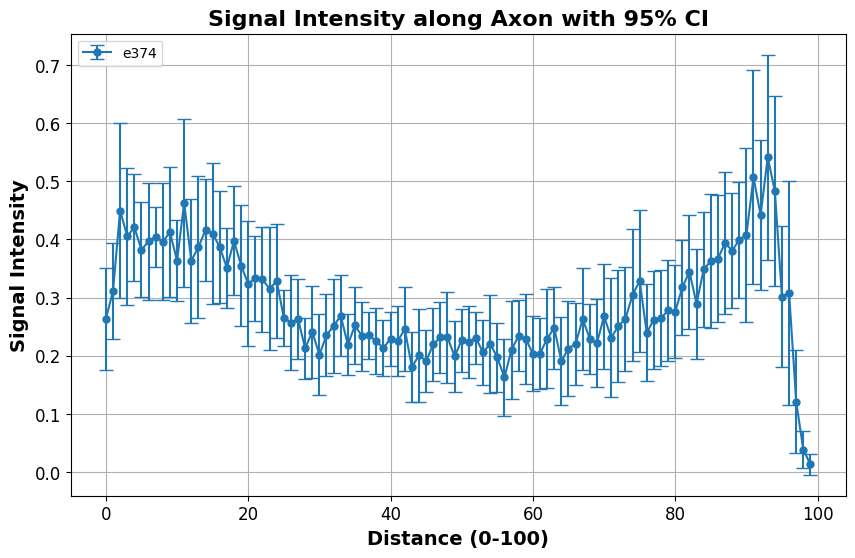

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Processing condition folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt
Initialized empty dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\1
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\1\Values.csv
Added column '1_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\10
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\10\Values.csv
Added column '10_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\2
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\2\Values.csv
Added column '2_Values' to dataframe.
Processing folder: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\3
Processing CSV file: C:/Users/oes6098/Desktop/2.28.24 5A Neck Mutant Dispersal\wt\3\Values.csv
Added column '3_Values' to dataframe.
Processing folder:

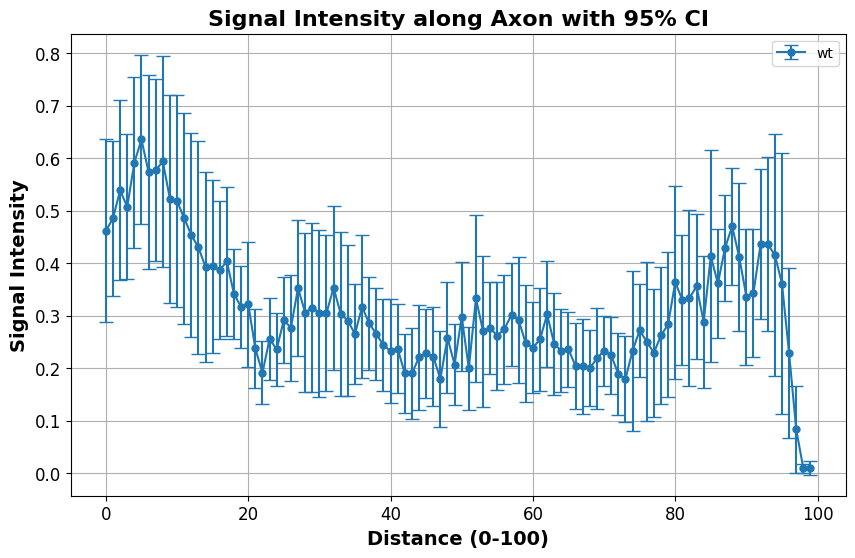

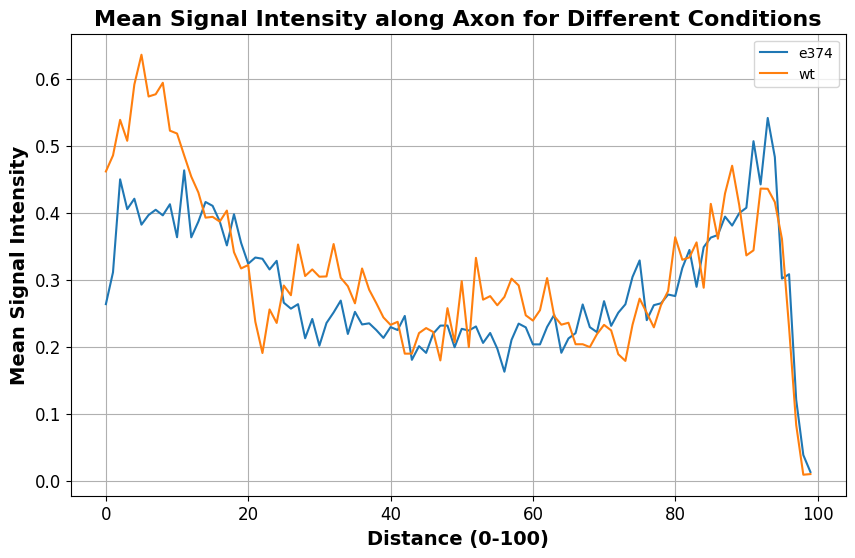

In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog

# Select directory containing the folders
dirPath = filedialog.askdirectory(title='Select directory containing folders')
print(f"Selected directory: {dirPath}")

# Get a list of directories (folders) in the selected directory
condition_folders = [folder for folder in os.listdir(dirPath) if os.path.isdir(os.path.join(dirPath, folder))]

# Number of points after normalization
num_points = 100

# Initialize an empty dictionary to store DataFrames for each condition folder
dfs = {}

# Loop through each condition folder in the directory
for i, condition_folder in enumerate(condition_folders):
    conditionFolderPath = os.path.join(dirPath, condition_folder)
    print(f"Processing condition folder: {conditionFolderPath}")

    # Initialize an empty dataframe for the current condition folder
    df = pd.DataFrame()
    print("Initialized empty dataframe.")

    # Loop through each folder in the condition folder
    for foldername in os.listdir(conditionFolderPath):
        folderPath = os.path.join(conditionFolderPath, foldername)
        print(f"Processing folder: {folderPath}")
        
        # Loop through each CSV file in the folder
        for filename in os.listdir(folderPath):
            if filename.endswith('.csv'):
                filePath = os.path.join(folderPath, filename)
                print(f"Processing CSV file: {filePath}")
                
                # Import data from CSV file
                data = pd.read_csv(filePath)
                X1 = data.iloc[:, 0]
                Y1 = data.iloc[:, 1]
                
                # Normalize X-values
                Xnorm = (X1 - X1.min()) / (X1.max() - X1.min())
                
                # Normalize Y-values
                Ynorm = (Y1 - Y1.min()) / (Y1.max() - Y1.min())
                
                # Interpolate to ensure exactly num_points values
                Xnorm_interp = np.linspace(0, 1, num_points)
                Ynorm_interp = np.interp(Xnorm_interp, Xnorm, Ynorm)
                
                # Add normalized Y-values to the dataframe as a new column
                column_name = f"{foldername}_{os.path.splitext(filename)[0]}"
                df[column_name] = Ynorm_interp
                print(f"Added column '{column_name}' to dataframe.")

    # Save the dataframe to the dictionary with the condition folder name as key
    dfs[condition_folder] = df

    # Save the dataframe to an Excel file in the condition folder
    excelFilePath = os.path.join(conditionFolderPath, f'normalized_data_condition_{i}.xlsx')
    df.to_excel(excelFilePath, index=False)
    print(f"Dataframe saved to Excel file: {excelFilePath}")

    # Compute mean and 95% CI
    mean_intensity = df.mean(axis=1)  # Mean across different cells
    std_intensity = df.std(axis=1)     # Standard deviation across different cells
    n = df.shape[1]                    # Number of cells
    ci = 1.96 * (std_intensity / np.sqrt(n))  # 95% CI

    # Plot mean signal intensity with error bars and a connecting line
    plt.figure(figsize=(10, 6))  # Adjust figure size
    plt.errorbar(df.index, mean_intensity, yerr=ci, fmt='o-', capsize=5, markersize=5, label=condition_folder)
    plt.xlabel('Distance (0-100)', fontsize=14, fontweight='bold')
    plt.ylabel('Signal Intensity', fontsize=14, fontweight='bold')
    plt.title('Signal Intensity along Axon with 95% CI', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)  # Increase x-axis tick font size
    plt.yticks(fontsize=12)  # Increase y-axis tick font size
    plt.grid(True)
    plt.legend()  # Show legend

    # Save the plot as a vector image file (EPS) in the same directory as the Excel file
    plotFilePath = os.path.join(conditionFolderPath, f'signal_intensity_plot_condition_{i}.eps')
    plt.savefig(plotFilePath, format='eps')
    print(f"Plot saved as vector image file (EPS): {plotFilePath}")

    plt.show()

# Create a plot showing different conditions in different colors
plt.figure(figsize=(10, 6))  # Adjust figure size

# Plot each condition's mean signal intensity with different colors
for condition, df in dfs.items():
    mean_intensity = df.mean(axis=1)
    plt.plot(df.index, mean_intensity, label=condition)

plt.xlabel('Distance (0-100)', fontsize=14, fontweight='bold')
plt.ylabel('Mean Signal Intensity', fontsize=14, fontweight='bold')
plt.title('Mean Signal Intensity along Axon for Different Conditions', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size
plt.grid(True)
plt.legend()  # Show legend
plt.show()
